<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [36]:
# SETUP
from datascience import *
from prob140 import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('fivethirtyeight')
import pylab
from scipy import stats
import ipywidgets as widgets
from ipywidgets import interact

In [37]:
def createHittingTimes(lamb, total_time):
    waiting_times = np.array([])
    while True:
        newTime = np.random.exponential(1/lamb)
        if sum(waiting_times) + newTime > total_time:
            break
        waiting_times = np.append(waiting_times, newTime)
    hitting_times = np.cumsum(waiting_times)
    return hitting_times

def plotHittingTimes(hitting_times, total_time, lamb):
    Plot_abstract(
        lambda i, time: plt.plot(time, 0, color='red', marker='o', ms = 5),
        lamb=lamb, t=total_time, mult=1, hitting_times=hitting_times, figsize=(10,1)
    )
    plt.text(total_time, -.2, total_time, horizontalalignment='left')
    plt.xlim(-0.1, 1.1)

In [38]:
def Plot_abstract(plot_each, lamb, t, mult=1.5, hitting_times=None,figsize=(10,2)):
    plt.figure(figsize=figsize)
    if hitting_times is None:
        hitting_times = createHittingTimes(lamb, mult*t)
    
    plt.arrow(0, 0, mult*t, 0, width=.005*figsize[1]/2, color='black', head_width=0.1*min(1,t*mult/4))
    #print(min(0.1,.1*figsize[1]/4*t*mult))
    for i,time in enumerate(hitting_times):
        plot_each(i, time)
    plt.vlines(0, -1/20., 1/20., lw=2)
    plt.text(0, -.2, '0', horizontalalignment='right')
    # plt.text(1.5*t, -.2, 'Time', horizontalalignment='center')
    width = min(0.5, 0.5*t/4)
    plt.ylim(-1 * width, width)
    plt.xlim(-1, mult*t + 1)
    plt.axis('off');
    return hitting_times

def Plot_process():
    def plot_each(i, time):
        plt.plot(time, 0, 'ro', ms = 5, color='red') 
    Plot_abstract(plot_each, lamb=1, t=5)
    plt.text(1.5*2.5, -.4, 'time', horizontalalignment='center')

def Plot_waiting_times():
    def plot_each(i, time):
        plt.plot(time, 0, 'ro', ms = 5, color='red') 
        if i <= 2:
            plt.text(time, -.2, '$T_%d$'%(i+1), horizontalalignment='center')
        
    Plot_abstract(plot_each, lamb=1/3, t=5)
    plt.title('$T_r = $ Time of the $r$th Arrival', fontsize=15)

def Plot_inter_arrival_times():
    previous_time = 0
    colors = ['green', 'purple', 'orange']

    def plot_each(i, time):
        nonlocal previous_time
        plt.plot(time, 0, 'ro', ms = 5, color="red")
        if i <= 2:
            plt.hlines(0, previous_time, time, color=colors[i], lw=2)
            plt.text(time, -.2, '$T_%d$'%(i+1), horizontalalignment='center')
            previous_time = time
    Plot_abstract(plot_each, lamb=1/3, t=5)
    plt.title('Times Between Consecutive Arrivals', fontsize=15);
    
def waiting_time_tail(r):
    t = 4
    def plot_each(i, time):
        plt.plot(time, 0, 'ro', ms = 5, color="red") 
    hitting_times = Plot_abstract(plot_each, 0.5, 4, 1.75)
    if sum(hitting_times < t) < r:
        answer = 'Yes.'
    else:
        answer = 'No.'
    plt.vlines(t, 0., 2, color="green", linewidths=(2,))
    plt.text(t, -.2, "t", horizontalalignment='center')
    plt.title('For $r = $'+str(r)+', is $T_r > t$ ?  '+answer);

def thinHittingTimes(lamb, total_time, p_of_blue):
    allHittingTimes= createHittingTimes(lamb, total_time)
    which_blue = np.random.rand(len(allHittingTimes)) < p_of_blue
    blue_hits = allHittingTimes[np.nonzero(which_blue)]
    red_hits = allHittingTimes[np.nonzero(1-which_blue)]
    return blue_hits, red_hits

def Plot_thinned_processes(lamb, p_blue):
    blue, red = thinHittingTimes(lamb, 1, p_blue)
    def plot_each(i, time): # this is jank af
        color = 'blue' if time in blue else 'red'
        plt.plot(time, 0, 'ro', ms = 5, color=color)
    Plot_abstract(plot_each, lamb=lamb, t=1, mult=1, hitting_times=list(blue)+list(red), figsize=(10,1))
    plt.title("Original Process", fontsize=10)
    plt.xlim(-0.1, 1.1 )
    
    Plot_abstract(plot_each, lamb=lamb, t=1, mult=1, hitting_times=blue, figsize=(10,1))
    plt.title("Blue Process", fontsize=10)
    plt.xlim(-0.1, 1.1 )
    
    Plot_abstract(plot_each, lamb=lamb, t=1, mult=1, hitting_times=red, figsize=(10,1))
    plt.title("Red Process", fontsize=10)
    plt.xlim(-0.1, 1.1 )


In [39]:
def draw_rect(ax, x, y, w, h, col, opaqueness):
    ax.add_patch(patches.Rectangle((x, y),w,h,color=col, alpha=opaqueness))


def plotDiscreteIntervals(hitting_times, total_time, intervals):
    fig1 = plt.figure(figsize=(10, 1))
    ax1 = fig1.add_subplot(111)
    plt.hlines(0, 0, total_time, lw=2)
    plt.text(0, -.2, '0', horizontalalignment='right')
    plt.text(total_time, -.2, str(total_time), horizontalalignment='left')
    plt.ylim(-.5, .5)
    plt.xlim(-0.1, total_time + 0.1 )
    plt.text(total_time/2, -.4, 'time', horizontalalignment='center')
    plt.axis('off')
    
    end_points = [i * total_time/intervals for i in range(0, intervals+1)]
    plt.vlines(end_points, -1/40., 1/40., lw=2) #remove this line to get rid of tick marks 
    for i in range(0, intervals):
        left_endpoint = end_points[i]
        right_endpoint = end_points[i+1]
        for time in hitting_times:
            if time <= right_endpoint and time >= left_endpoint:
                draw_rect(ax1, left_endpoint, 0, total_time/intervals, 1/20, 'red', 1)
                break
    
def Plot_discretized_process(lamb):
    total_time = 1
    hitting_times = createHittingTimes(lamb, total_time)
    uniform_slider = widgets.IntSlider(
        value=1,min=1,max=100,step=1, description='Subintervals')
    @interact(intervals = uniform_slider)
    def plot(intervals):
        plotHittingTimes(hitting_times, total_time, lamb)
        plotDiscreteIntervals(hitting_times, total_time, intervals) 


# Lab 9: Poisson Process #

A *point process* on the real line is a random sequence of points on the line. Often the line is thought of as an axis representing time. Then the points can be thought of as the random times of arrivals of some kind of item or occurrences of some kind of event. 

In this lab you will analyze a point process called the *Poisson process*. It records the times of events that are essentially unpredictable – events that appear to occur randomly and spontaneously with no prior warning. The process is used as a model in many areas, including queuing theory (items joining a queue or leaving it), physics (a Geiger counter recording particles), genetics (nucleotide base substitutions in a gene over time), computer vision (photons arriving at a sensor), and seismology (the times of earthquakes). 

Run the cell below several times to see the main visualization that will be used throughout the lab.

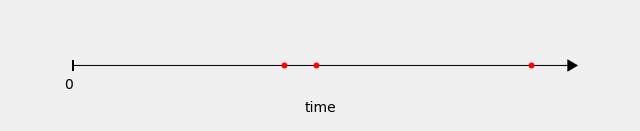

In [40]:
Plot_process()

The horizontal line represents time. The arrow on the right signifies that the axis continues beyond the interval that is displayed. The time at which you start observing the process is labeled 0 and is called the time origin. Each red dot represents an arrival.

By assumption, **there are no double-hits** in the arrival process. That is, it is not possible for two arrivals to happen at exactly the same time.

Because the red dots have a diameter big enough for you to see them, two dots might have a considerable overlap if two arrivals are close enough in time. That doesn't mean that the two arrivals are at the same time – they can't be, by assumption.

It is also important to note that **the chance of an arrival at any fixed time is 0**. This is a feature of continuous time, analogous to the chance that a continuous random variable equals any fixed value is 0.

Therefore if you are counting arrivals in a time interval, you shouldn't worry about whether or not the interval includes its endpoints.

What you will learn in this lab:

- Two equivalent descriptions of the process, in terms of independent Poisson and exponential random variables
- A physical model for gamma random variables with integer shape parameters, and a formula for the cdf of the gamma $(r, \lambda)$ distribution for integer $r$
- What happens if you randomly select arrivals in a Poisson process
- A way of thinking about statistical models for physical phenomena
- Applications of the Poisson process model, in particular to predicting the chances of earthquakes in California

Be prepared for a workout in numerous ideas you have learned in the course.

#### Note on Computation ####
Several exercises in this lab ask you to use a code cell "find the probability" or "find the value" of something. That means you should write a Python expression that evaluates to the quantity in the question. In some exercises, there are restrictions on what you can use as part of the expression.

## Instructions
Your labs have two components: a written portion and a portion that also involves code. Written work should be completed on paper, and coding questions should be done in the notebook. You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the lab are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

#newpage

## Part 1: Arrival Counts ##
To start off, you will examine how the Poisson distribution arises out of a simple set of assumptions about the process of arrivals. 

### Rate ###
The process has a numerical parameter $\lambda > 0$ that is the expected number of arrivals per unit time. The arrivals are random, of course, so there will most likely be different numbers of arrivals in successive units of time. You can think of $\lambda$ as an average over time.

The higher $\lambda$ is, the more arrivals you expect per unit time. So $\lambda$ is called the *intensity* of the process, or the *arrival rate*, which is usually shortened to just *rate*.

In our code, we will use `lam` for $\lambda$ because `lambda` has a different meaning in Python.

Notice that the rate is a constant, not a function of time. That is, the intensity of arrivals is the same at all times. Under this assumption the process is called *time-homogeneous* or just *homogeneous*.

You should only use this model in situations where the assumption of homogeneity is reasonable. You would not want to assume time homogeneity in situations where the intensity of arrivals varies over time. For example, If you are modeling people arriving at the ticket counter of a movie theater, you might expect more crowding right before movie start times than at other times.

### Discretizing the Arrival Times ###
To understand the process in continuous time, it helps to create a discrete approximation. 

- The first graph in the output of the cell below is a realization of the process, which we are watching on the time interval 0 to 1. We have specified $\lambda = 5$ but you can change that.
- The second graph consists of discrete approximations created by dividing the unit interval into a finite number of subintervals of equal length. A subinterval is colored red if at least one of the arrivals is in that subinterval.

At the start there is only one "sub"-interval in the second graph, and that is the entire unit interval. So the whole interval is colored red. Now move the slider (slowly!) and see what happens as you divide the unit interval more finely.

In [41]:
lam = 5
Plot_discretized_process(lam)

interactive(children=(IntSlider(value=1, description='Subintervals', min=1), Output()), _dom_classes=('widget-…

As the number of subintervals increases, each subinterval gets smaller and the second graph starts to look more and more like the first.

### a) [ON PAPER] The Number of Arrivals in the Unit Interval ###

Formally, the discretization can be described as follows.

- Fix a non-negative integer $n$. At Stage $n$, divide the unit interval into $n$ subintervals of length $1/n$ each. 
- For $1 \le j \le n$, let $I_j$ be the indicator that there is at least one arrival in subinterval $j$. That is, let $I_j$ be the indicator of the event that subinterval $j$ is colored red.

Here are the probabilistic **assumptions of the model**. The main assumption is the first one, which reflects the "unpredictable" nature of the arrivals.

- $I_1, I_2, \ldots, I_n$ are i.i.d. Bernoulli $(p_n)$ variables.
- The sequence $p_1, p_2, \ldots$ is *consistent*, that is, $p_n \downarrow 0$ as $n \to \infty$ and $np_n \to \lambda$ as $n \to \infty$.
- Let $X$ be the number of arrivals in the unit interval. Then $E(X) = \lambda$.

Fill in the blanks and **explain briefly**. For both (i) and (ii), the first blank should be filled with the name of a distribution and its parameters.

(i) Fix $n$ and let $X_n$ be the number of red subintervals at stage $n$. The exact distribution of $X_n$ is $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$, and $E(X_n) = \underline{~~~~~~~~~~~~~~}$. 

(ii) As $n \to \infty$, $X_n$ converges to the number of arrivals in the unit interval. The distribution of $X_n$ tends to the $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$ distribution, which has expectation $\underline{~~~~~~~~~~~~~~~}$.

### b) [ON PAPER] Poisson Process: First Description ###
One of the key assumptions of the process is that the numbers of arrivals in disjoint time intervals are independent of each other. In Part **a**, this was reflected in the assumption that at each stage $n$, the $n$ subintervals are colored red independently of each other.

For $0 < a < b$, let $N_{(a, b)}$ be the number of arrivals in the time interval $(a, b)$. Remember that the chance of an arrival at a single point (for example, at $a$, or at $b$) is 0.

(i) What is the distribution of $N_{(0, 2)}$? Why? What assumptions did you make?

(ii) What is the distribution of $N_{(5, 12)}$?

#### Poisson Process: First Description ####
The following description of the Poisson process will now come as no surprise.

Fix $\lambda > 0$. A *time-homogeneous Poisson process with rate $\lambda$* is a process of arrivals such that:

- The numbers of arrivals in disjoint intervals are independent.
- The number of arrivals in an interval of length $t$ has the Poisson distribution with mean $(\lambda t)$.

The parameter $\lambda$ has the same interpretation as before: it is the expected number of arrivals in an interval of length 1.

Remember that the term *time-homogeneous* refers to the fact that the distribution of the number of arrivals in an interval depends only on $\lambda$ and the length of the interval, not on where the interval is on the time axis. For example, the number of arrivals in the interval $(1, 10)$ has the same distribution as the number of arrivals in the interval $(1001, 1010)$.

The assumption of time-homogeneity simplifies calculations, and in many situations it can be too simple as a model. Nevertheless it is often a good starting point in analyses. Sometimes it can be justified by physics, for example if the process consists of radioactive particles arriving at a Geiger counter, or photons arriving at a sensor.

### c) Photon Noise ###
In a brief [report](https://people.csail.mit.edu/hasinoff/pubs/hasinoff-photon-2012-preprint.pdf) written by Sam Hasinoff of Google, photon noise is described as "uncertainty associated with the measurement of light". Understanding photon noise helps increase clarity in imaging. Skim the beginning of the Theory section of the report to recognize a familiar process. You might also enjoy skimming the list of Hasinoff's [publications](https://people.csail.mit.edu/hasinoff/) on computer vision.

Suppose photons arrive at a sensor according to a Poisson process at a rate of 4 arrivals per unit time. What is the chance of at least 30 arrivals in each of two consecutive 10-unit time intervals?

In [42]:
lam = 4
(1- stats.poisson.cdf(30, 10*lam))**2

0.8804178623033256

#newpage

## Part 2: Waiting Times ##
The first description of the Poisson process involved the counts of arrivals in finite time intervals. Another way to look at the process is to just list the times of the arrivals. 

For $r \ge 1$, let $T_r$ be the time of the $r$th arrival. 

The cell below shows a Poisson arrival process with $T_1$, $T_2$, and $T_3$ appearing as labels on the time axis. There might be fewer than three arrivals, in which case there will be fewer than three labels. Or there might be more than three arrivals, but only the first three will be labeled.

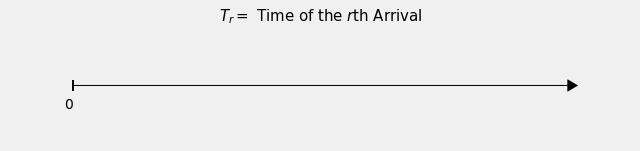

In [43]:
Plot_waiting_times()

### a) [ON PAPER] Distribution of $T_1$ ###
In this exercise you will find the distribution of $T_1$, the waiting time till the first arrival, by identifying its survival function. 

Run the cell below. In the figure, $t$ is an arbitrary fixed time and the function is checking whether or not the event $\{T_1 > t\}$ has occurred.

When you see a No, think about what has to happen for the answer to be Yes. You might have to run the cell several times (ctrl-Return is helpful) to get a Yes as the answer. 

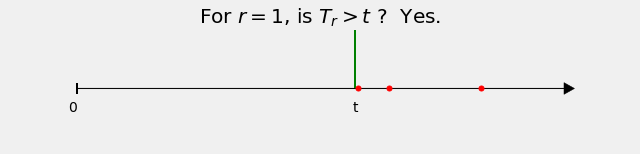

In [44]:
r = 1
waiting_time_tail(r)

(i) Fill in the blanks based on your observations above. The first blank should be filled with math operations and numerical values, and the second with a formula involving $\lambda$ and $t$.

For $t > 0$,

$$
P(T_1 > t) ~ = ~ P(N_{(0, t)} ~~ \underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~}), ~~~ \text{so } ~~~
P(T_1 > t) ~ = ~ \underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}.
$$

(ii) Fill in the first blank with the appropriate distribution and its parameters, and the second with the expectation.

The distribution of $T_1$ is $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$ and $E(T_1) = \underline{~~~~~~~~~~~~~~~~~~~~}$.

### b) Inter-Arrival Times ###
Let the *inter-arrival times* be the *gaps* or lengths of time between consecutive arrivals. By convention, the first "inter"-arrival time is simply taken to be $T_1$. In general, define the inter-arrival times as follows, using the letter $G$ for "gap":

- $G_1 = T_1$
- For $i > 1$, $G_i = T_i - T_{i-1}$.

Run the cell below several times. The figure labels $T_1$, $T_2$, and $T_3$ as before. The length of the green segment is $G_1$, the length of the purple segment is $G_2$, and the length of the orange segment is $G_3$. 

Remember that there might be fewer than three arrivals in the interval; there might be more, but we aren't labeling them all; and the arrivals might be so close that it's hard to read the labels.

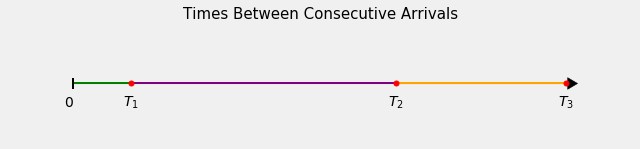

In [45]:
Plot_inter_arrival_times()

It can be shown that the process "starts over" at each $T_i$ independently of what happened before. For example, if you stand at $T_2$ and look right, it's as though you were standing at the origin and observing a fresh process. This should not be very surprising. Indeed, it should remind you of many "starting over" calculations that you have done in the past.

What is the distribution of $G_2$? Why?


**Your answer here.**

The distribution of $G_2$ is also Exponential($\lambda$), since the time between each observation $X_1$ and $X_2$ is independent of one another and once you observe $X_1$, you start over from time "0" since now you are observing the distance between $X_1$ and $X_2$ which is just a repeteated sample of the distance from 0 to $X_1$ hence each $G_n$ has a Exponential($\lambda$) distribution.

For fixed $n$, what is the joint distribution of $G_1, G_2, \ldots, G_n$?


**Your answer here.**

$\prod^{n}_{i=1}G_i =\prod^{n}_{i=1}\lambda e^{-\lambda x_i}$

### Poisson Process: Second Description ###
We now have a new description of the Poisson process in terms of waiting times. 

Fix $\lambda > 0$. A *time homogeneous Poisson process with rate $\lambda$* is a process of arrivals such that:

- the inter-arrival times are i.i.d. exponential $(\lambda)$ variables. The rate $\lambda$ of the exponential distribution of gaps is the same as the arrival rate of the process.

At least informally, you have seen why the first description (in terms of Poisson counts, in **1c**) implies the second. A bit of work is needed to establish that the second description implies the first, but we'll skip that.

It is important to keep in mind is that the second description is in terms of *continuous* random variables, the inter-arrival times. The first description is in term of *discrete* random variables, the arrival counts.

### c) [ON PAPER] Distribution of $T_r$ for $r \ge 1$ ###

Fix an integer $r > 0$ and let $T_r$ be the time of the $r$th arival.

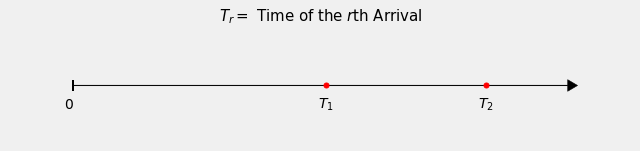

In [46]:
Plot_waiting_times()

As before, let the inter-arrival times $G_i$ be defined as $G_1 = T_1$ and $G_i = T_i - T_{i-1}$ for $i > 1$.

For integer $r > 0$, write $T_r$ in terms of $G_1, G_2, \ldots$ and hence find

(i) $E(T_r)$

(ii) $Var(T_r)$

(iii) the distribution of $T_r$

### d) Density of $T_r$ ###
Fill in the blank in the cell below to draw graphs of the density of $T_r$ for $r = 1, 2, 3, 4$ in the case $\lambda = 1$. Refer to Homework 9 for relevant code.

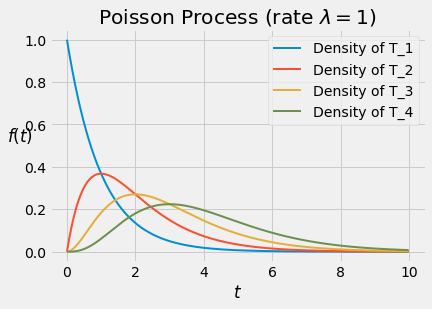

In [47]:
t = np.arange(0, 10, 0.01)
for r in np.arange(1, 5):
    f = stats.gamma.pdf(t, r, scale = 1)
    plt.plot(t, f, lw=2, label='Density of T_'+str(r))  # plot the density of T_r
plt.xlabel('$t$')
plt.ylabel('$f(t)$', rotation=0)
plt.legend()
plt.title('Poisson Process (rate $\lambda = 1$)');

### e) [ON PAPER] CDF of $T_r$ ###
You can write a formula for this in terms of the density you found in Part **d**, but you will not enjoy calculating the integral unless you are unusually fond of repeated integration by parts.

Instead, use the fact that the Poisson process has a representation in terms of counts, which are discrete variables and hence easy to work with.

Run the cell below several times. You used the same function in Part **a**.

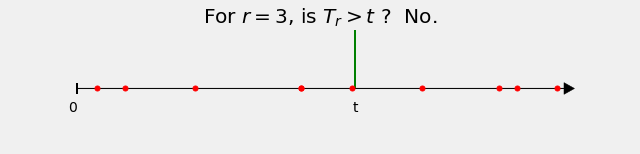

In [48]:
r = 3
waiting_time_tail(r)

Fill in the blanks below based on what you concluded after repeatedly running the cell above. Here $S_{T_r}$ is the survival function of $T_r$, and $F_{T_r}$ is the cdf of $T_r$.

Fix a positive integer $r$. For $t > 0$,

$$
P(T_r > t) ~ = ~ P(N_{(0, t)} ~~ \underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~}), ~~~ \text{so } ~~~
S_{T_r}(t) ~ = ~ \underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~} ~~~ \text{and } ~~~
F_{T_r}(t) ~ = ~ \underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}.
$$

### f) Repair Times ###
Homogeneous Poisson processes are often used in reliability theory, for example to [model failures](https://www.itl.nist.gov/div898/handbook/apr/section1/apr171.htm) of a component of a machine, assuming that the failures happen unpredictably. The component might be as simple as a lightbulb, or more complicated such as an electronic component of a cell phone.

Suppose calls for repair occur according to a Poisson process at a rate of one every two days. In your calculations below, **use only `stats.poisson.pmf`, `stats.poisson.cdf`, and arithmetic operations.** Don't use any continuous distributions. 

(i) If you start recording calls now, what is the chance that it takes more than 15 days for you to record 10 calls?

In [49]:
#Probability that less then 10 calls occur in 15 days
lam = (1/2)*15
stats.poisson.cdf(9, lam)

0.7764076130197146

(ii) What is the chance that the fifth call arrives less than a week after the second one? 

It might help to sketch a time axis on some scratch paper and mark the second call. 

In [50]:
lam = (1/2)*7
1-stats.poisson.cdf(2, lam)

0.6791528011378658

#newpage

## Part 3: Thinning ##
Before you begin this part, please review the Summary at the end of [Section 7.1](http://prob140.org/textbook/Chapter_07/01_Poissonizing_the_Binomial.html) of the textbook.

In some Poisson processes, each arrival can be in one of several categories. For example, cars arriving at a toll booth could be domestic or imported. Items arriving at a campus Lost and Found desk could be electronics, notebooks, or everything else.

We will work in the case of just two categories, but you will see that there is an immediate generalization to any finite number of categories as in [Section 7.2](http://prob140.org/textbook/Chapter_07/02_Poissonizing_the_Multinomial.html).

Consider a Poisson process with rate $\lambda$, with arrivals represented by red points. Suppose that each arrival is colored blue with chance $p$, independently of all other arrivals. Then the blue points form a process of their own, as do the remaining red points. 

Run the cell below a few times to see what this looks like. We have taken $\lambda = 10$ and $p = 0.6$, but you can change these parameters.

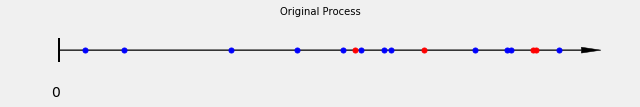

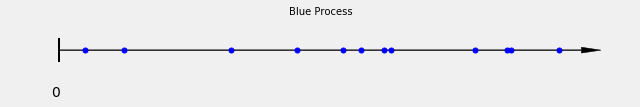

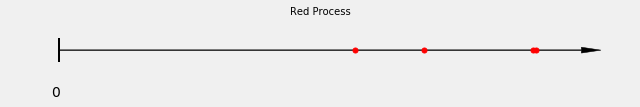

In [51]:
lam = 10
p_blue = 0.9
Plot_thinned_processes(lam, p_blue)

The original process has been separated into a blue process and a red one. Therefore the blue and red processes have a lower intensity than the original process. Their points are more thinly spread out. That is why they are called *thinned* processes.

If you *superpose* the blue process and the red one, that is, if you place the two processes on top of each other, you will recover the original process.

### a) The Blue Process ###
For a fixed time $t$, let $N_{(0, t)}$ be the total number of points in $(0, t)$, and let $B_{(0, t)}$ be the number of blue points in $(0, t)$. Fill in the blanks with distribution names and parameters. **Explain briefly.**

For each $t > 0$, the total number of points $N_{(0, t)}$ has the $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$ distribution, and the number of blue points $B_{(0, t)}$ has the $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$ distribution.


**Your answer here.**

Poisson($\lambda$t) and Poisson(0.6$\lambda$t)

This is because of the Poisson additivity property. We know that the distribution of the superposed process of blue and red will be Poisson($\lambda$t) from part 1 of the lab. Thus, from this we also know that if we split up the points into blue and red with the number of blue being p*$\lambda$, then the distribution of blue points will be Poisson(p$\lambda$t) and the distribution of red points will be Poisson((1-p)$\lambda$t), which follow Poisson addition to add up to: Poisson(p$\lambda$t) + Poisson((1-p)$\lambda$t) = Poisson((p+1-p)$\lambda$t) = Poisson($\lambda$t)

Let $I_1$ and $I_2$ be two disjoint time intervals. For each $j = 1, 2$, let $B_{I_j}$ be the number of blue points in the interval $I_j$. Are $B_{I_1}$ and $B_{I_2}$ independent? **Explain briefly.**


**Your answer here.**

$B_{I_1}$ and $B_{I_2}$ are not independent since we know that $B_{I_2}$ cannot be less then $B_{I_1}$, hence if $B_{I_1}$ is equal to any number number X $\geq$ 0, then we also know that $B_{I_2}$ $\geq$ X, hence the they cannot be independent.

Fill in the blank:

The blue process is a Poisson process with rate $\underline{~~~~~~~~~~~~~~~~~~~~~~}$ per unit time.


**Your answer here.**

p$\cdot \lambda$

### b) The Blue and Red Processes ###

For a fixed $t > 0$, let $R_{(0, t)}$ be the number of red points in the interval $(0, t)$.

Fill in the blanks:

$R_{(0, t)}$ has the $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$ distribution.


**Your answer here.**

Poisson((1-p)$\lambda$t)

For each $t > 0$, are the random variables $B_{(0, t)}$ and $R_{(0, t)}$ dependent or independent? Explain.


**Your answer here.**

The random variables $B_{(0, t)}$ and $R_{(0, t)}$ are independent of each other since we do not know the total number of number of points in the interval, $N_{(0,2)}$ then this means that the two random variables can take on any value related to their distributions independent of each other. This is because, without knowing N, B can be some value x, and R can be some other value y, but these values are determined by the respective random variables distributions and are not affected by the other random variables value since N itself is a random variable and is not a given in this case. Thus the relationship between B and R is independent.

Fill in the blanks. The first blank should be filled with one of the words *dependent* or *independent*.

The blue process and the red process are $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$ Poisson processes. The blue process has rate $\underline{~~~~~~~~~~~~~~~~~~~~~}$ and the red process has rate $\underline{~~~~~~~~~~~~~~~~~~~~~}$.


**Your answer here.**

Independent, p$\lambda$, (1-p)$\lambda$

### c) Lost and Found ###
Items arrive at a lost-and-found desk according to a Poisson process at the rate of 3 items per day. Each item is a cell phone with chance 5%, independently of all other items.

Use only `stats.poisson.pmf`, `stats.poisson.cdf`, and arithmetic operations to find the chance that in 5 days at least one cell phone and at most 10 other items arrive.

In [52]:
(1-stats.poisson.cdf(1,3*0.05*5))*stats.poisson.cdf(10,3*0.95*5)

0.027684834549737396

### d) The Blue and Red Sequence ###
This exercise is about the lost-and-found processes in Part **c**.

(i) Find the chance that the first cell phone arrives after exactly 15 other items. 

Your calculation will be much simpler if you notice that this question is only about the "blue" and "red" sequence, and not about the times at which the points arrive or the gaps of time between them.

In [53]:
(0.95**15)*0.05

0.023164561507987652

(ii) Find the chance that the third cell phone arrives after at least 20 other items. Fill in the blank in the comment cell first, and think about what distribution you should use.

In [54]:
"""Among the first 22 items that arrive, there should be 2 cell phones and 20 other items
Hence, probability of this occuring is binomial, 2 successes in 22 trials with probability of 5% success.
Then we must take into account the probability of getting a third cell phone right after all of the first 22
trials have occurred"""
stats.binom.pmf(2, 22, 0.05)*0.05#problem, we can change when the third appears since variable n

0.010351281009546675

#newpage

## Part 4: Earthquakes in California ##

"All models are wrong. Some are useful." This trenchant assessment of modeling is attributed to the British statistician [George Box](https://en.wikipedia.org/wiki/George_E._P._Box) and has been the subject of [much discussion](https://en.wikipedia.org/wiki/All_models_are_wrong).

What Box was saying was that while no statistical model can capture all the complexity of a physical system, sometimes simple representations can help us begin to understand systems without taking all of the complexity into account. 

Keep that in mind as you skim this [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5665405/) in a 2016 issue of [The American Statistician](https://amstat.tandfonline.com/doi/abs/10.1080/00031305.2016.1200484#.XKWnbutKgyd), a publication of [The American Statistical Association](https://www.amstat.org/). It includes the use of the homogeneous Poisson process to model times of earthquakes in California. It's not surprising that the model might be an over-simplification; see for example this [lecture](https://www.stat.berkeley.edu/~stark/Seminars/psu10.pdf) by Prof. [Philip Stark](https://www.stat.berkeley.edu/~stark/) of Berkeley's Statistics department. However, it's OK as a rough starting point, and you can use it to make some rough predictions.

Here are the data used in the paper. The table `quakes` consists of data on all earthquakes in California of magnitude 4.9 or greater, between January 1857 and August 2014. There were 51 such quakes. Of course there were smaller earthquakes too, but those are not part of the data set. 

**In what follows, the word "quake" means "earthquake of magnitude 4.9 or more".**

`Magnitude` is a measure of the strength of an earthquake, and `MMI` stands for the Modified Mercalli Intensity scale that measures the intensity of shaking.

An important attribute for the analysis is the `Gap` in time, measured in days, between the quake and the previous one.

In [55]:
quakes = Table.read_table('Lab09_data/big_CA_earthquakes.csv')

In [56]:
quakes.num_rows

51

In [57]:
quakes.show()

Date,Name,Area,Magnitude,MMI,Days from 1/9/1857,Gap
8/24/2014,South Napa,North Bay,6,8,57570,1603
4/4/2010,Baja California,Baja California,7.2,7,55967,85
1/9/2010,Eureka,North Coast,6.5,6,55882,529
7/29/2008,Chino Hills,LA Area,5.5,6,55353,273
10/30/2007,Alum Rock,South Bay,5.6,6,55080,1408
12/22/2003,San Simeon,Central Coast,6.6,8,53672,1205
9/3/2000,Yountville,North Bay,5,7,52467,323
10/16/1999,Hector Mine,Eastern,7.1,7,52144,2098
1/17/1994,Northridge,LA Area,6.7,9,50046,568
6/28/1992,Landers,Inland Empire,7.3,9,49478,64


The figure below plots the dates of the 51 earthquakes.

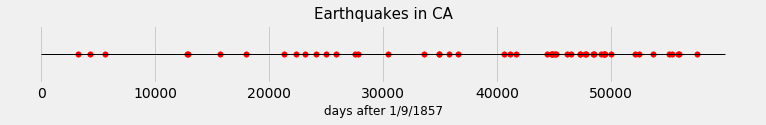

In [58]:
plt.figure(figsize=(12, 1))
plt.scatter(quakes.column(5), 0*np.ones(quakes.num_rows), color='red', s=30)
plt.hlines(0, 0, 60000, lw=1)
plt.xticks(np.arange(0, 50001, 10000))
plt.yticks([])
plt.xlabel('days after 1/9/1857', fontsize=12)
plt.title('Earthquakes in CA', fontsize=15);

Can this reasonably be modeled by a Poisson process? To answer this, go back and look at the Second Description of the Poisson Process, in **2b**. In the exercise below you will see whether the gaps look exponential.

### a) The Gaps and the Rate ###
Draw a histogram of the gaps. 

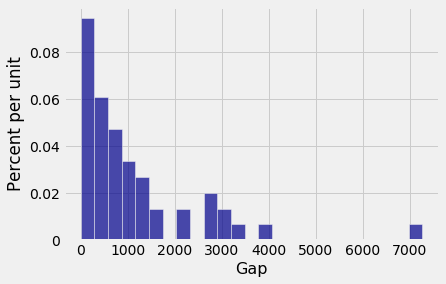

In [59]:
quakes.hist('Gap', bins=25)

If you model the gap sizes as i.i.d. exponential variables, what is your estimate of the rate $\lambda$? Answer this by comparing the mean of the exponential distribution and the average of the observed gaps.

In [149]:
gaps = quakes.column('Gap')
mean_gap = np.mean(gaps)

lam = 1/1128.8235294117646

mean_gap, lam

(1128.8235294117646, 0.0008858780614903596)

Complete the cell below to superpose the appropriate exponential density on the histogram of gaps. Remember that the `scale` argument of `stats.expon` is $1/\lambda$, not $\lambda$.

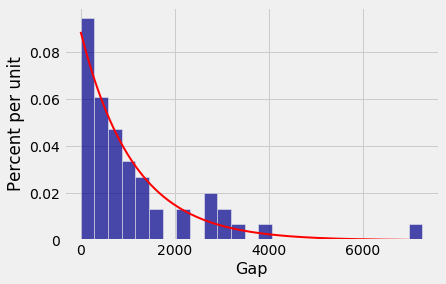

In [150]:
quakes.hist('Gap', bins=25)
t = np.arange(7000)
f = stats.expon.pdf(t, scale = 1/lam)
plt.plot(t, f, color='red', lw=2);

If you have done your calculations correctly, the model of i.i.d. exponential gaps should look plausible. Of course with only 51 observations there will always be some doubt.


Now suppose that you model future quakes as a Poisson process with the rate that you assigned to `lam` at the start of this exercise. 

**Caution:** The answers that you get based on this model should only be taken as a very rough starting point towards a deeper analysis. Apart from the need to check whether all the assumptions of the model apply, there is also the need to account for the variability in the estimate of $\lambda$ even assuming that the model works. All of that is the domain of time series or geostatistics classes; we will stick to the probability calculations.

### b) A Prediction for the Next Year ###

In the calculations below, you can assume that years have 365 days. Don't worry about details such as leap years or whether you should include the day when you start your observations. Also assume that "within a year from now" means "within 365 days from the day you do the calculation".

(i) Find the probability that there is at least one quake within a year from now.

In [180]:
# P(at least one quake within a year from now)

1-stats.poisson.cdf(0, 365*lam)

0.2762762299248045

### c) Another Prediction for the Next Year ###

Find the observed proportion of quakes that had magnitudes above 6.0.

In [123]:
# number of quakes with magnitude at least 6.0
num_big = sum(quakes['Magnitude'] >= 6)
# proportion of quakes with magnitude at least 6.0
prop_big = num_big/len(quakes['Magnitude'])

num_big, prop_big

(37, 0.7254901960784313)

Suppose that each future quake has magnitude at least 6.0 with chance `prop_big` independently of all others. As in the previous part, you can ignore the variability in that estimate; leave that for a time series or geostatistics class.

Under the assumption above, find the chance that within 365 days from now there is one quake of magnitude at least 6.0 and at least one with magnitude in the interval $[4.9, 6)$. Remember that all the quakes in our process have magnitude at least 4.9.

In [209]:
# P(1 quake of magnitude at least 6.0 and at least one quake of magnitude in [4.9, 6.0))

stats.poisson.pmf(1, 365*lam*prop_big)*(1-stats.poisson.cdf(0, 365*lam*(1-prop_big)))



0.015758422561682667

### d) Predicting A Big One ###
Under the same assumptions as in Part **c**, find the number of years $n$ such that there is 99% chance that within $n$ years from now there will be at least one quake of magnitude at least 6.0. It's fine if $n$ is not an integer.

In [205]:
# number of years n such that
# P(at least quake of magnitude 6.0 will happen in n years) = 0.99
n = stats.expon.ppf(0.99,scale = 1/(lam*prop_big))
n

7165.395881279308

## Conclusion ##

What you have learned in this lab:

- Properties of one of the most commonly studied stochastic processes
- How simple assumptions about randomness can lead to a powerful theory
- A physical model for gamma $(r, \lambda)$ random variables when $r$ is an integer
- Ways in which the major distribution families interact with each other
- An approach to modeling physical phenomena

This lab required quite a bit of mental agility. Congratulations on a job well done!

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using an application. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general Lab 9 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Lab 9 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**


### **We will not grade assignments which do not have pages selected for each question.** 